In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from os import system

In [2]:
data = pd.read_csv('/Users/halo/AI4Good Practice/Project/Datasets/PD_median_std_all_datasets.csv')

In [3]:
#Moving Status column to the last
df1=data.pop('Status') 
data['Status'] = df1

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7066.0,3.532500e+03,2039.922834,0.000000,1766.250000,3532.500000,5298.750000,7065.000000
Gender,7066.0,3.330031e-01,0.471321,0.000000,0.000000,0.000000,1.000000,1.000000
MDVP:Jitter(%),7066.0,1.157611e-15,1.000071,-1.000999,-0.457090,-0.191588,0.149046,17.396045
MDVP:Jitter(Abs),7066.0,1.516226e-16,1.000071,-1.118584,-0.598383,-0.253889,0.281531,14.077927
Jitter:PPQ5,7066.0,1.626211e-16,1.000071,-0.824134,-0.386261,-0.183953,0.084868,18.439490
Jitter:DDP,7066.0,-2.125702e-16,1.000071,-0.882121,-0.440468,-0.197559,0.134785,18.173013
MDVP:Shimmer,7066.0,-2.966318e-16,1.000071,-1.160573,-0.593922,-0.283162,0.210582,7.751805
MDVP:Shimmer(dB),7066.0,1.907322e-16,1.000071,-1.192021,-0.604778,-0.281041,0.212092,6.668002
Shimmer:APQ3,7066.0,-3.441214e-16,1.000071,-1.136386,-0.608285,-0.292269,0.251098,9.325606
Shimmer:APQ5,7066.0,-1.698595e-16,1.000071,-1.075888,-0.579911,-0.278599,0.197045,9.290697


In [5]:
# Fetching the number of PD patients
data.Status.value_counts()

1    6706
0     360
Name: Status, dtype: int64

In [6]:
#Defining our labels
X = data.drop("Status",axis=1)
Y = data["Status"]

# Splitting Data into 70% Training data and 30% Testing Data:
X_train, X_Test, y_train,  y_Test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=42,stratify=Y)
print(f"X_train length is {len(X_train)}.")

#70% Training data and 20% Testing Data and 10% Validation Data
X_test, X_valid, y_test, y_valid = train_test_split(X_Test, y_Test, train_size=0.75,test_size=0.25, random_state=101, stratify=y_Test)
print(f"X_test length is {len(X_test)}.")
print(f"X_valid length is {len(X_valid)}.")

X_train length is 4946.
X_test length is 1590.
X_valid length is 530.


In [7]:
#Seeing the number/percentage of the split
np.unique(y_train, return_counts=True)

(array([0, 1]), array([ 252, 4694]))

# K-Nearest Neighbor Classification

The KNeighborsRegressor computes the mean of the nearest neighbor labels

In [8]:
#k-NN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)

#fiting training data on model
knn_model.fit(X_train, y_train)
score= knn_model.score(X_test,y_test)
print(f"The fitting score is {score}")

#Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse1 = sqrt(mse)
print(f"Mean square error for training data is {rmse1}")

#evaluating the predictive performance of our model
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse2 = sqrt(mse)
print(f"Mean square error for test data is {rmse2}")

The fitting score is 0.980503144654088
Mean square error for training data is 0.06516022741331395
Mean square error for test data is 0.13963114031587634


In [9]:
#prediction using K-NN
y_pred = knn_model.predict(X_test)
print(f"The prediction for the data is {y_pred}")
#Looking at accuracy by counting the number of misclassified cases
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in KNN: {}'.format(count_misclassified))

The prediction for the data is [1 1 1 ... 1 1 1]
Misclassified samples in KNN: 31


# Parameter Tuning & Model Evaluation

In [10]:
#Predicting the best value of k
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)

#using .best_params_ to find the best performing k
print(f"The best value for k is {gridsearch.best_params_}")

#Seeing how this predicted k affects the training and testing performances
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

print(f"Mean square error for test data is {test_rmse}")

The best value for k is {'n_neighbors': 1}
Mean square error for test data is 0.12027222790416517


Text(0, 0.5, 'Mean Error')

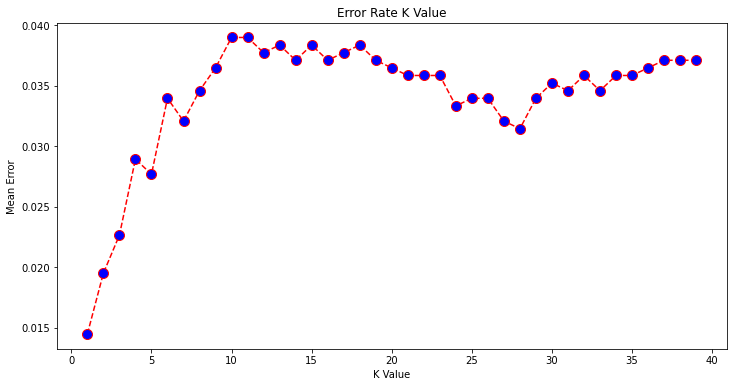

In [11]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
# plot the error values against K values using the elbow graph method
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [13]:
#Taking the weighted average of neighbors based on distance
#Gridsearch 
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)



gridsearch.best_params_

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print(f"The rate of the mean squared error is {test_rmse}")

The rate of the mean squared error is 0.12027222790416517


In [14]:
#Evaluating the Algorithm using a confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
y_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  73    8]
 [  23 1486]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        81
           1       0.99      0.98      0.99      1509

    accuracy                           0.98      1590
   macro avg       0.88      0.94      0.91      1590
weighted avg       0.98      0.98      0.98      1590



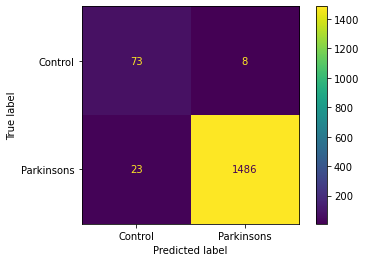

In [16]:
#Plotting Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model, X_test, y_test, display_labels=['Control', 'Parkinsons'])  
plt.show() 

In [17]:
#Looking at accuracy by counting the number of misclassified cases
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in KNN: {}'.format(count_misclassified))

Misclassified samples in KNN: 31


In [18]:
#Looking at the ROC of our Model
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
print(f"The False Positive Rate prediction is {fpr}")
print(f"The True Positive Rate prediction is {tpr}")
print(f"The Thresholds are {thresholds}")

The False Positive Rate prediction is [0.         0.93962264 1.        ]
The True Positive Rate prediction is [nan nan nan]
The Thresholds are [2 1 0]


/Users/halo/opt/anaconda3/envs/training/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


In [19]:
#Compute (AUC) Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, multi_class='ovr')

0.9429963429300738

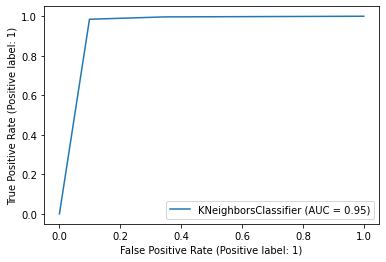

In [20]:
#Plotting ROC
metrics.plot_roc_curve(knn_model, X_test, y_test)  
plt.show()

In [21]:
from sklearn import model_selection
# log loss (closer to 0 is better)
for k in range(2,30,4):
  kfold = model_selection.KFold(n_splits=k, shuffle=True)
  results = model_selection.cross_val_score(knn_model, X, Y, cv=kfold, scoring='neg_log_loss')
  print("Logloss: %.3f (%.f)" % (results.mean(), k))

Logloss: -0.367 (2)
Logloss: -0.161 (6)
Logloss: -0.135 (10)
Logloss: -0.136 (14)
Logloss: -0.110 (18)
Logloss: -0.096 (22)
Logloss: -0.101 (26)
